In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [6]:
#여러개의 범주형 자료 => 가변수 생성
df=pd.DataFrame({'m_id':[1,2,3,4,5],
            'm_gen':['rock', 'rock', 'pop', 'disco','pop']},
            columns=['m_id', 'm_gen'])

In [7]:
df

,m_id,m_gen
0,1,rock
1,2,rock
2,3,pop
3,4,disco
4,5,pop


In [9]:
mm=pd.get_dummies(df['m_gen'])
mm

,disco,pop,rock
0,0,0,1
1,0,0,1
2,0,1,0
3,1,0,0
4,0,1,0


In [10]:
mm=df.join(mm.add_prefix('genre_'))
mm

,m_id,m_gen,genre_disco,genre_pop,genre_rock
0,1,rock,0,0,1
1,2,rock,0,0,1
2,3,pop,0,1,0
3,4,disco,1,0,0
4,5,pop,0,1,0


In [11]:
import random
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [12]:
mnist=input_data.read_data_sets("MNIST_data/", one_hot=True)

W0805 10:15:30.028603  7292 deprecation.py:323] From <ipython-input-12-8fff32bca56b>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0805 10:15:30.028603  7292 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0805 10:15:30.028603  7292 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
I

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz


W0805 10:15:31.410246  7292 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0805 10:15:31.410246  7292 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz


W0805 10:15:32.133279  7292 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [ ]:
#5만개 train 이미지(입력,레이블) => 모델
#1만개 test 이미지=> 모델 => 출력결과 정확도?

In [14]:
nb_classes=10 #분류결과의 종류 개수

In [16]:
x=tf.placeholder(tf.float32, [None, 28*28])
y=tf.placeholder(tf.float32, [None, nb_classes])
w=tf.Variable(tf.random_normal([28*28,nb_classes]))
b=tf.Variable(tf.random_normal([nb_classes]))
hf=tf.nn.softmax(tf.matmul(x,w)+b)
cost= tf.reduce_mean(-tf.reduce_sum(y*tf.log(hf), axis=1))
train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)

is_correct=tf.equal(tf.arg_max(hf,1), tf.arg_max(y,1))
accuracy=tf.reduce_mean(tf.cast(is_correct, tf.float32))
#에폭(전체 데이터를 1번트레이닝 -> 1에폭)
training_epochs=15
batch_size=100

W0805 10:50:11.692214  7292 deprecation.py:323] From <ipython-input-16-f2a014c5404c>:9: arg_max (from tensorflow.python.ops.gen_math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.math.argmax` instead


Epoch:    1 cost: 2.600500018
Epoch:    2 cost: 1.069430390
Epoch:    3 cost: 0.859196381
Epoch:    4 cost: 0.756205606
Epoch:    5 cost: 0.691342896
Epoch:    6 cost: 0.644927541
Epoch:    7 cost: 0.609557256
Epoch:    8 cost: 0.581280538
Epoch:    9 cost: 0.558019187
Epoch:   10 cost: 0.538356307
Epoch:   11 cost: 0.521609783
Epoch:   12 cost: 0.507193080
Epoch:   13 cost: 0.494378634
Epoch:   14 cost: 0.482548437
Epoch:   15 cost: 0.472194156
learning finished
accuracy : 0.8948
Label: [0]
prediction: [0]


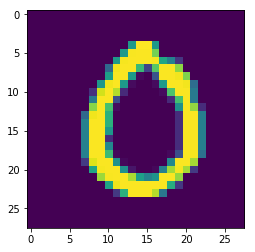

In [30]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in  range(training_epochs):#5만개 이미지 * 15번 트레이닝
        avg_cost=0
        total_batch=int(mnist.train.num_examples / batch_size) #5만/100
        for i in range(total_batch): #500번(1번에 100개씩 이미지를 읽겠다)
            batch_xs, batch_ys=mnist.train.next_batch(batch_size)
            cv, _=sess.run([cost, train], feed_dict={x:batch_xs, y:batch_ys})
            avg_cost+=cv/total_batch #  100데이터코스트/500
        print("Epoch:", '%4d' % (epoch+1),'cost:', '{:.9f}'.format(avg_cost))    
    print("learning finished")# 1, 3, 7, 10, 14   35/5=7
    print("accuracy :", sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels}))
    
    r=random.randint(0, mnist.test.num_examples-1)
    print("Label:",sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
    print("prediction:",sess.run(tf.argmax(hf,1),feed_dict={x:mnist.test.images[r:r+1]}))    
    
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28))
    plt.show()
    
        

In [4]:
xdata=[[0,0],[0,1],[1,0],[1,1]]
ydata=[[0],[1],[1],[0]]

In [7]:
x=tf.placeholder(tf.float32, [None,2])
y=tf.placeholder(tf.float32, [None,1])
w=tf.Variable(tf.random_normal([2,1]))
b=tf.Variable(tf.random_normal([1]))
hf=tf.sigmoid(tf.matmul(x,w)+b)
cost= -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)
predicted= tf.cast(hf>0.5,dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

In [11]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={x:xdata, y:ydata})
        if step % 100 ==0:
            print(step, sess.run(cost, feed_dict={x:xdata, y:ydata}), 
                  sess.run(w))
    hv, pv, av=sess.run([hf, predicted, accuracy],feed_dict={x:xdata, y:ydata})
    print("hf:", hv, "pre:",pv, "acc:",av)
    print("bias:",sess.run(b))


0 1.328496 [[1.6581801]
 [1.4827605]]
100 0.708832 [[0.55201304]
 [0.44870952]]
200 0.7000659 [[0.34942067]
 [0.2942024 ]]
300 0.69631594 [[0.23225203]
 [0.20274164]]
400 0.6945937 [[0.15487209]
 [0.13910435]]
500 0.69380665 [[0.10348288]
 [0.09505888]]
600 0.69344765 [[0.06927272]
 [0.06477235]]
700 0.69328415 [[0.04644549]
 [0.04404134]]
800 0.6932095 [[0.03118158]
 [0.02989726]]
900 0.69317555 [[0.0209566 ]
 [0.02027049]]
1000 0.69316006 [[0.01409683]
 [0.0137303 ]]
1100 0.6931531 [[0.00948911]
 [0.00929331]]
1200 0.69314986 [[0.00639104]
 [0.00628643]]
1300 0.6931483 [[0.00430636]
 [0.00425051]]
1400 0.6931477 [[0.00290272]
 [0.00287287]]
1500 0.6931474 [[0.00195713]
 [0.00194118]]
1600 0.6931473 [[0.00131987]
 [0.00131134]]
1700 0.6931472 [[0.00089028]
 [0.00088572]]
1800 0.6931472 [[0.00060052]
 [0.00059808]]
1900 0.6931472 [[0.00040523]
 [0.00040393]]
2000 0.6931472 [[0.00027342]
 [0.00027273]]
2100 0.6931472 [[0.00018448]
 [0.00018411]]
2200 0.6931472 [[0.00012448]
 [0.00012428

In [ ]:
#xor-nn 재구성

In [15]:
xdata=[[0,0],[0,1],[1,0],[1,1]]
ydata=[[0],[1],[1],[0]]

In [16]:
x=tf.placeholder(tf.float32, [None,2])
y=tf.placeholder(tf.float32, [None,1])

w1=tf.Variable(tf.random_normal([2,2]))
b1=tf.Variable(tf.random_normal([2]))
L1=tf.sigmoid(tf.matmul(x, w1)+b1)

w2=tf.Variable(tf.random_normal([2,1]))
b2=tf.Variable(tf.random_normal([1]))
hf=tf.sigmoid(tf.matmul(L1, w2)+b2)

cost= -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)
predicted= tf.cast(hf>0.5,dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

In [17]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={x:xdata, y:ydata})
        if step % 100 ==0:
            print(step, sess.run(cost, feed_dict={x:xdata, y:ydata}), 
                  sess.run(w1), sess.run(w2))
    hv, pv, av=sess.run([hf, predicted, accuracy],feed_dict={x:xdata, y:ydata})
    print("hf:", hv, "pre:",pv, "acc:",av)
    print("\nbias:",sess.run(b1), sess.run(b2))


0 0.9305051 [[0.7362978  0.29177555]
 [0.8307666  2.245496  ]] [[-0.9524046]
 [-0.799187 ]]
100 0.69378006 [[0.6403954  0.24696343]
 [0.71394545 2.1650429 ]] [[-0.5125077 ]
 [-0.30685994]]
200 0.6932237 [[0.6336577  0.25358033]
 [0.69562376 2.1501083 ]] [[-0.5019549 ]
 [-0.25489616]]
300 0.69292647 [[0.6303637 0.2605577]
 [0.6824879 2.1384873]] [[-0.50439715]
 [-0.22022757]]
400 0.69269353 [[0.6286933  0.26710817]
 [0.6722908  2.1287541 ]] [[-0.50913936]
 [-0.19078864]]
500 0.6925045 [[0.6284367 0.2731443]
 [0.6646254 2.1205373]] [[-0.5156578 ]
 [-0.16549887]]
600 0.6923454 [[0.6294697  0.27863908]
 [0.6592115  2.1135614 ]] [[-0.5237579 ]
 [-0.14367822]]
700 0.6922054 [[0.6317025  0.28359348]
 [0.6558345  2.107617  ]] [[-0.5333032 ]
 [-0.12474833]]
800 0.6920768 [[0.63507205 0.2880237 ]
 [0.65433013 2.1025357 ]] [[-0.544199  ]
 [-0.10821027]]
900 0.6919538 [[0.6395376  0.2919536 ]
 [0.65457493 2.0981858 ]] [[-0.556384  ]
 [-0.09363095]]
1000 0.69183147 [[0.64507586 0.29540876]
 [0.6564

9200 0.025894603 [[4.82229   5.853115 ]
 [4.8349524 5.8889174]] [[-9.283047]
 [ 8.739377]]
9300 0.02527398 [[4.8362308 5.8708158]
 [4.8486276 5.905989 ]] [[-9.329426]
 [ 8.784807]]
9400 0.0246811 [[4.849829  5.8880544]
 [4.861973  5.922626 ]] [[-9.374797]
 [ 8.829238]]
9500 0.024114156 [[4.8631    5.904852 ]
 [4.8750014 5.9388456]] [[-9.419201]
 [ 8.872712]]
9600 0.023571528 [[4.8760605 5.9212294]
 [4.887728  5.9546685]] [[-9.462675]
 [ 8.91527 ]]
9700 0.02305181 [[4.88872  5.937205]
 [4.900166 5.970112]] [[-9.505259]
 [ 8.956946]]
9800 0.022553558 [[4.901093  5.9527974]
 [4.9123263 5.9851923]] [[-9.546985]
 [ 8.997775]]
9900 0.022075428 [[4.91319   5.9680233]
 [4.92422   5.9999237]] [[-9.587887]
 [ 9.037791]]
10000 0.021616358 [[4.9250245 5.9828954]
 [4.9358587 6.014322 ]] [[-9.6279955]
 [ 9.077026 ]]
hf: [[0.02625578]
 [0.98056316]
 [0.9805084 ]
 [0.02033686]] pre: [[0.]
 [1.]
 [1.]
 [0.]] acc: 1.0

bias: [-7.568341  -2.6517324] [-4.2063065]


In [18]:
#nn cost = 0.0216

In [19]:
x=tf.placeholder(tf.float32, [None,2])
y=tf.placeholder(tf.float32, [None,1])

w1=tf.Variable(tf.random_normal([2,10]))
b1=tf.Variable(tf.random_normal([10]))
L1=tf.sigmoid(tf.matmul(x, w1)+b1)

w2=tf.Variable(tf.random_normal([10,1]))
b2=tf.Variable(tf.random_normal([1]))
hf=tf.sigmoid(tf.matmul(L1, w2)+b2)

cost= -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)
predicted= tf.cast(hf>0.5,dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

In [23]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={x:xdata, y:ydata})
        if step % 100 ==0:
            print(step, "cost:",sess.run(cost, feed_dict={x:xdata, y:ydata}))
    hv, pv, av=sess.run([hf, predicted, accuracy],feed_dict={x:xdata, y:ydata})
    print("hf:", hv, "pre:",pv, "acc:",av)
    #print("\nbias:",sess.run(b1), sess.run(b2))


0 cost: 0.87434363
100 cost: 0.6465674
200 cost: 0.62251395
300 cost: 0.595064
400 cost: 0.5641243
500 cost: 0.5298019
600 cost: 0.49233666
700 cost: 0.45229018
800 cost: 0.41063422
900 cost: 0.36867
1000 cost: 0.32782257
1100 cost: 0.2893865
1200 cost: 0.2543136
1300 cost: 0.22311723
1400 cost: 0.19590339
1500 cost: 0.17247936
1600 cost: 0.15247872
1700 cost: 0.13546467
1800 cost: 0.12099814
1900 cost: 0.10867497
2000 cost: 0.09814173
2100 cost: 0.08909881
2200 cost: 0.081296556
2300 cost: 0.07452928
2400 cost: 0.06862814
2500 cost: 0.06345501
2600 cost: 0.05889655
2700 cost: 0.05485972
2800 cost: 0.051267646
2900 cost: 0.04805702
3000 cost: 0.045174867
3100 cost: 0.042577136
3200 cost: 0.040226758
3300 cost: 0.03809242
3400 cost: 0.036147706
3500 cost: 0.034370057
3600 cost: 0.03274021
3700 cost: 0.03124158
3800 cost: 0.029859852
3900 cost: 0.028582636
4000 cost: 0.027399225
4100 cost: 0.026300162
4200 cost: 0.025277283
4300 cost: 0.024323324
4400 cost: 0.023431865
4500 cost: 0.02259

In [24]:
#wide nn : 0.007

In [27]:
x=tf.placeholder(tf.float32, [None,2])
y=tf.placeholder(tf.float32, [None,1])

w1=tf.Variable(tf.random_normal([2,10]))
b1=tf.Variable(tf.random_normal([10]))
L1=tf.sigmoid(tf.matmul(x, w1)+b1)

w2=tf.Variable(tf.random_normal([10,10]))
b2=tf.Variable(tf.random_normal([10]))
L2=tf.sigmoid(tf.matmul(L1, w2)+b2)

w3=tf.Variable(tf.random_normal([10,10]))
b3=tf.Variable(tf.random_normal([10]))
L3=tf.sigmoid(tf.matmul(L2, w3)+b3)

w4=tf.Variable(tf.random_normal([10,10]))
b4=tf.Variable(tf.random_normal([10]))
L4=tf.sigmoid(tf.matmul(L3, w4)+b4)

w5=tf.Variable(tf.random_normal([10,10]))
b5=tf.Variable(tf.random_normal([10]))
L5=tf.sigmoid(tf.matmul(L4, w5)+b5)

w6=tf.Variable(tf.random_normal([10,10]))
b6=tf.Variable(tf.random_normal([10]))
L6=tf.sigmoid(tf.matmul(L5, w6)+b6)

w7=tf.Variable(tf.random_normal([10,10]))
b7=tf.Variable(tf.random_normal([10]))
L7=tf.sigmoid(tf.matmul(L6, w7)+b7)

w8=tf.Variable(tf.random_normal([10,10]))
b8=tf.Variable(tf.random_normal([10]))
L8=tf.sigmoid(tf.matmul(L7, w8)+b8)

w9=tf.Variable(tf.random_normal([10,10]))
b9=tf.Variable(tf.random_normal([10]))
L9=tf.sigmoid(tf.matmul(L8, w9)+b9)

w10=tf.Variable(tf.random_normal([10,1]))
b10=tf.Variable(tf.random_normal([1]))
hf=tf.sigmoid(tf.matmul(L9, w10)+b10)

cost= -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)
predicted= tf.cast(hf>0.5,dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

In [28]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={x:xdata, y:ydata})
        if step % 100 ==0:
            print(step, "cost:",sess.run(cost, feed_dict={x:xdata, y:ydata}))
    hv, pv, av=sess.run([hf, predicted, accuracy],feed_dict={x:xdata, y:ydata})
    print("hf:", hv, "pre:",pv, "acc:",av)
    #print("\nbias:",sess.run(b1), sess.run(b2))


0 cost: 0.6950097
100 cost: 0.69314075
200 cost: 0.6931407
300 cost: 0.69314045
400 cost: 0.69314027
500 cost: 0.69314015
600 cost: 0.6931399
700 cost: 0.6931398
800 cost: 0.69313973
900 cost: 0.6931395
1000 cost: 0.6931393
1100 cost: 0.69313914
1200 cost: 0.69313896
1300 cost: 0.6931388
1400 cost: 0.69313866
1500 cost: 0.6931385
1600 cost: 0.69313836
1700 cost: 0.6931381
1800 cost: 0.693138
1900 cost: 0.6931378
2000 cost: 0.6931376
2100 cost: 0.6931375
2200 cost: 0.69313735
2300 cost: 0.6931371
2400 cost: 0.69313705
2500 cost: 0.69313675
2600 cost: 0.6931367
2700 cost: 0.6931365
2800 cost: 0.69313633
2900 cost: 0.69313616
3000 cost: 0.693136
3100 cost: 0.6931358
3200 cost: 0.6931356
3300 cost: 0.6931354
3400 cost: 0.69313526
3500 cost: 0.693135
3600 cost: 0.6931349
3700 cost: 0.6931348
3800 cost: 0.69313455
3900 cost: 0.69313437
4000 cost: 0.6931342
4100 cost: 0.69313407
4200 cost: 0.69313383
4300 cost: 0.69313365
4400 cost: 0.6931336
4500 cost: 0.6931333
4600 cost: 0.6931332
4700 cos

In [ ]:
#wide deep nn : 0.002

0 cost: nan
100 cost: nan
200 cost: nan
300 cost: nan
400 cost: nan
500 cost: nan
600 cost: nan
700 cost: nan
800 cost: nan
900 cost: nan
1000 cost: nan
1100 cost: nan
1200 cost: nan
1300 cost: nan
1400 cost: nan
1500 cost: nan
1600 cost: nan
1700 cost: nan
1800 cost: nan
1900 cost: nan
2000 cost: nan
2100 cost: nan
2200 cost: nan
2300 cost: nan
2400 cost: nan
2500 cost: nan
2600 cost: nan
2700 cost: nan
2800 cost: nan
2900 cost: nan
3000 cost: nan
3100 cost: nan
3200 cost: nan
3300 cost: nan
3400 cost: nan
3500 cost: nan
3600 cost: nan
3700 cost: nan
3800 cost: nan
3900 cost: nan
4000 cost: nan
4100 cost: nan
4200 cost: nan
4300 cost: nan
4400 cost: nan
4500 cost: nan
4600 cost: nan
4700 cost: nan
4800 cost: nan
4900 cost: nan
5000 cost: nan
5100 cost: nan
5200 cost: nan
5300 cost: nan
5400 cost: nan
5500 cost: nan
5600 cost: nan
5700 cost: nan
5800 cost: nan
5900 cost: nan
6000 cost: nan
6100 cost: nan
6200 cost: nan
6300 cost: nan
6400 cost: nan
6500 cost: nan
6600 cost: nan
6700 co